## Task:

Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.6 Then, for each image in the training set, create four
shifted copies (one per direction) and add them to the training set. Finally, train
your best model on this expanded training set and measure its accuracy on the
test set. You should observe that your model performs even better now! This
technique of artificially growing the training set is called data augmentation or
training set expansion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import fetch_openml
def savefig(fig, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    fig.savefig('images/' + name + '.png')

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target 
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [3]:
some_digit = X_train[0]

In [4]:
from scipy.ndimage import shift

In [6]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], cval = 0, mode='constant')
    return shifted_image.reshape([-1])

In [8]:
some_digit_shifted = shift_image(some_digit, 0, 5)
some_digit_shifted.shape

(784,)

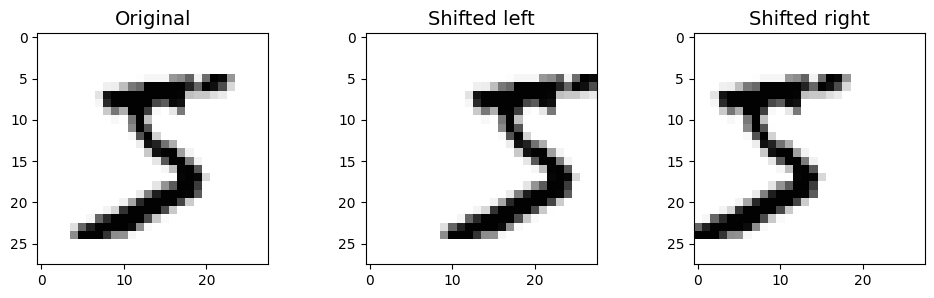

In [12]:
image_left = shift_image(some_digit, 0, 5)
image_right = shift_image(some_digit, 0, -5)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(some_digit.reshape(28,28), cmap = 'Greys')

plt.subplot(132)
plt.title('Shifted left')
plt.imshow(image_left.reshape(28,28), cmap = 'Greys')

plt.subplot(133)
plt.title('Shifted right')
plt.imshow(image_right.reshape(28,28), cmap = 'Greys')
savefig(plt, 'image_shift')
plt.show()

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, -1), (0, 1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [15]:
X_train_augmented.shape

(300000, 784)

In [16]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
shuffle_idx

array([178729,  95233,  41911, ...,  60822,  25596, 208835])

In [17]:
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx] 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [19]:
agumented_accuracy = knn_clf.score(X_test, y_test)
agumented_accuracy

0.9763